In [1]:
import gzip
import numpy as np
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense

# Funktionen zum Laden der Daten
def open_images(filename):
    with gzip.open(filename, "rb") as file:
        data = file.read()
        return np.frombuffer(data, dtype=np.uint8, offset=16)\
            .reshape(-1, 28, 28)\
            .astype(np.float32)

def open_labels(filename):
    with gzip.open(filename, "rb") as file:
        data = file.read()
        return np.frombuffer(data, dtype=np.uint8, offset=8)

# Daten laden
X_train = open_images(".../DataspellProjects/pythonProject2/Fashionmnist/train-images-idx3-ubyte.gz")
y_train = open_labels(".../Donch/DataspellProjects/pythonProject2/Fashionmnist/train-labels-idx1-ubyte.gz")

X_test = open_images("C:/Users/Donch/DataspellProjects/pythonProject2/Fashionmnist/t10k-images-idx3-ubyte.gz")
y_test = open_labels("C:/Users/Donch/DataspellProjects/pythonProject2/Fashionmnist/t10k-labels-idx1-ubyte.gz")

y_train = to_categorical(y_train)  # 10 Klassen im FashionMNIST-Datensatz
y_test = to_categorical(y_test)

In [3]:
# Modell erstellen
model = Sequential()

# Input-Schicht mit 100 Neuronen, sigmoid-Aktivierung und Input-Shape von (784,)
model.add(Dense(100, activation="sigmoid", input_shape=(784,)))

# Output-Schicht mit 10 Neuronen (für 10 Klassen) und Softmax-Aktivierung
model.add(Dense(10, activation="softmax"))

# Modell kompilieren mit der richtigen Verlustfunktion für Mehrklassenklassifikation
model.compile(optimizer="sgd", 
              loss="categorical_crossentropy",  # Korrekte Verlustfunktion für One-Hot-codierte Labels
              metrics=["accuracy"])  # Metrik für die Genauigkeit

In [4]:
X_train.reshape(60000, 784)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [5]:
model.fit(X_train.reshape(60000, 784),  # Die Bilder auf ein (60000, 784) Format umwandeln
          y_train,  # Labels für die 10 Klassen
          epochs=10,
          batch_size=1000)

Epoch 1/10
60/60 [==============================] - 2s 2ms/step - loss: 1.5912 - accuracy: 0.5330
Epoch 2/10
60/60 [==============================] - 0s 2ms/step - loss: 1.1597 - accuracy: 0.6872
Epoch 3/10
60/60 [==============================] - 0s 2ms/step - loss: 1.0064 - accuracy: 0.7207
Epoch 4/10
60/60 [==============================] - 0s 2ms/step - loss: 0.9135 - accuracy: 0.7421
Epoch 5/10
60/60 [==============================] - 0s 3ms/step - loss: 0.8471 - accuracy: 0.7567
Epoch 6/10
60/60 [==============================] - 0s 3ms/step - loss: 0.7980 - accuracy: 0.7689
Epoch 7/10
60/60 [==============================] - 0s 3ms/step - loss: 0.7589 - accuracy: 0.7768
Epoch 8/10
60/60 [==============================] - 0s 3ms/step - loss: 0.7269 - accuracy: 0.7836
Epoch 9/10
60/60 [==============================] - 0s 3ms/step - loss: 0.7014 - accuracy: 0.7884
Epoch 10/10
60/60 [==============================] - 0s 3ms/step - loss: 0.6797 - accuracy: 0.7924


In [18]:
model.evaluate(X_test.reshape(-1, 784), y_test)
pred = model.predict(X_test.reshape(-1, 784))
predicted_classes = np.argmax(predictions, axis=1)





313/313 [==============================] - 0s 888us/step


In [19]:
for i, prediction in enumerate(predictions):
    print(f"Bild {i}: Vorhergesagte Klasse: {np.argmax(prediction)}, Wahrscheinlichkeiten: {prediction * 100}")


Bild 0: Vorhergesagte Klasse: 9, Wahrscheinlichkeiten: [ 0.92612517  0.85182106  0.43418077  0.45825666  0.6665824  11.666661
  1.0851208  17.362656    3.6209278  62.92767   ]
Bild 1: Vorhergesagte Klasse: 2, Wahrscheinlichkeiten: [ 1.4161991   0.49278256 71.025116    1.4845921   9.44859     0.7326708
 10.536768    0.4487812   3.5974138   0.8170857 ]
Bild 2: Vorhergesagte Klasse: 1, Wahrscheinlichkeiten: [7.0317793e-01 9.3292816e+01 3.7048897e-01 2.4528439e+00 8.5613716e-01
 6.8992645e-01 7.4060035e-01 4.8080078e-01 7.8268550e-02 3.3493978e-01]
Bild 3: Vorhergesagte Klasse: 1, Wahrscheinlichkeiten: [6.8661797e-01 9.3621017e+01 4.5857871e-01 2.1107993e+00 6.6735673e-01
 6.3237923e-01 7.8220677e-01 5.0047576e-01 8.6229302e-02 4.5433840e-01]
Bild 4: Vorhergesagte Klasse: 6, Wahrscheinlichkeiten: [ 6.669267   1.0594201 16.430576   1.2888656  5.2647     1.2479727
 61.260998   1.0828826  2.8476908  2.8476276]
Bild 5: Vorhergesagte Klasse: 1, Wahrscheinlichkeiten: [ 1.8953601  81.97892     0.

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


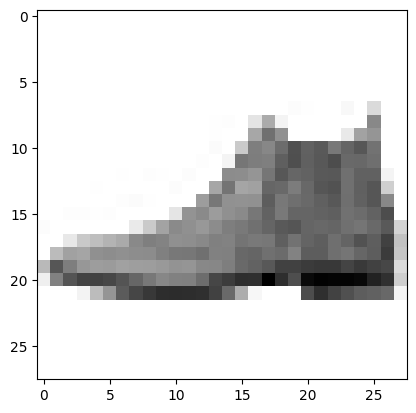

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt 

print(y_test[0])
plt.imshow(X_test[0], cmap="gray_r")
plt.show()

In [20]:
pred = model.predict(X_test.reshape(-1, 784))

313/313 [==============================] - 0s 956us/step


In [21]:
import numpy as np

np.argmax(pred[0])

9